<a id='top'></a>

# Homework 5: Confidence intervals and other things
***

**Name**: Ryan Wills

***

This assignment is due on Moodle by **5 PM on Friday November 9**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Sea-level rise, schmee-level rise!

You have been contacted by the local government of Key West, Florida, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file [linked here](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm0rl5dp6y4) and below.

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Key West from a watery fate?

In [2]:
# Local and web paths to the data; pick which works for you.
local_path = "data/sealevel_keywest.csv"
web_path   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/sealevel_keywest.csv"
file_path  = local_path

dfSL = pd.read_csv(file_path, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head()

,Year,Month,Day,SL
0,1913,1,20,1453
1,1913,1,21,1439
2,1913,1,22,1444
3,1913,1,23,1489
4,1913,1,24,1474


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [58]:
def clean_data(df):
    
    # compute fill-value used to replace missing SL data
        #according to website, fill value for missing data = 9999 or -9999
    
    #use pandas DataFrame.dropna() to remove missing rows
    df=df.drop(df[df.SL >= 9999].index)
    df=df.drop(df[df.SL <= -9999].index)

    #select only the data point on the second day of each month
    df = df.loc[df['Day'] == 2]
    
    #return a cleaned df
    dfClean = df
    return dfClean

dfClean = clean_data(dfSL)
dfClean.head()

,Year,Month,Day,SL
13,1913,2,2,1409
41,1913,3,2,1397
72,1913,4,2,1402
102,1913,5,2,1450
133,1913,6,2,1490


**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

**Bonus challenge (0 points):**  Why do we choose to work with the second day of each month instead of the first?  You may need to look at the original data set to answer this.

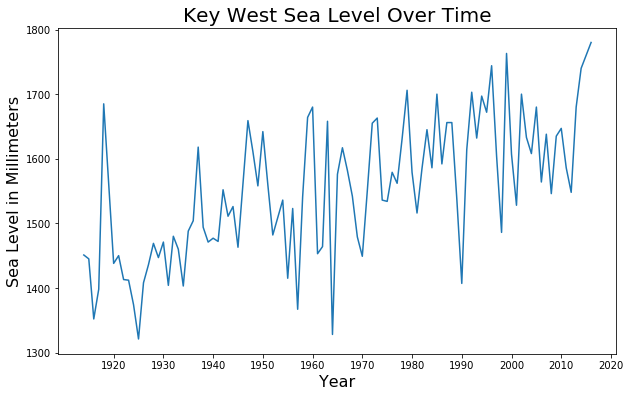

In [152]:
plotYear = dfClean.loc[dfClean['Month']==1]

fig,ax = plt.subplots(1,1,figsize = (10,6))
ax.plot(plotYear['Year'],plotYear['SL'])
ax.set_xlabel("Year", fontsize=16)
ax.set_ylabel("Sea Level in Millimeters", fontsize=16)
ax.set_title("Key West Sea Level Over Time",fontsize = 20)
_ = ax.set_xticks([1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020])

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each decade of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

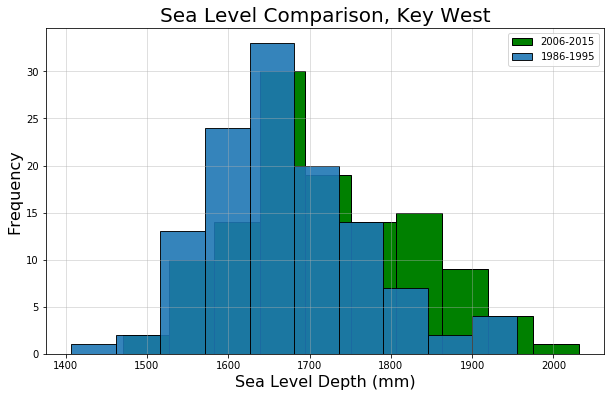

In [96]:
df86_95 = dfClean[dfClean['Year'].between(1986,1995)]
df86_95 = df86_95.drop(['Month','Day'], axis = 1)

df06_15 = dfClean[dfClean['Year'].between(2006,2015)]
df06_15 = df06_15.drop(['Month', 'Day'], axis = 1)

fig, ax = plt.subplots(1,1, figsize=(10,6))
df06_15['SL'].hist(ax=ax, edgecolor = 'black', color = 'green', label = '2006-2015')
df86_95['SL'].hist(ax=ax, edgecolor = 'black', alpha = 0.9, label = '1986-1995')

ax.set_title('Sea Level Comparison, Key West', fontsize = 20)
ax.set_xlabel('Sea Level Depth (mm)', fontsize = 16)
ax.set_ylabel('Frequency', fontsize =16)
ax.grid(alpha = .5)
ax.legend()

Based off of the graphs, the sea level from 2006-2015 has more frequent measurements of a deeper sea level, so I hypothesize that the mean sea level for that time period will be higher than the mean sea level from 1986-1995.

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

In [118]:
import math
sample_mean = df86_95['SL'].mean()
std_dev = df86_95['SL'].std()
z_alpha = stats.norm.ppf(.9995)
n = len(df86_95)
confidence_interval = []
confidence_interval.append(sample_mean - z_alpha * (std_dev/math.sqrt(n)))
confidence_interval.append(sample_mean + z_alpha * (std_dev/math.sqrt(n)))
print("The 99.9% confidence interval for the mean sea level from 1986-1995 is ", confidence_interval)

The 99.9% confidence interval for the mean sea level from 1986-1995 is  [1640.9854979907739, 1700.1645020092262]


In [102]:
sample_mean = df06_15['SL'].mean()
std_dev = df06_15['SL'].std()
z_alpha = stats.norm.ppf(.9995)
n = len(df06_15)
confidence_interval = []
confidence_interval.append(sample_mean - z_alpha * (std_dev/math.sqrt(n)))
confidence_interval.append(sample_mean + z_alpha * (std_dev/math.sqrt(n)))
print("The 99.9% confidence interval for the mean sea level from 2006-2015 is ", confidence_interval)
print(z_alpha * (std_dev/math.sqrt(n)))

The 99.9% confidence interval for the mean sea level from 2006-2015 is  [1687.4087192569768, 1753.9472129464129]
33.2692468447


In order to find the confidence intervals of these two time periods, I need to find the relevant information first. Using the '86-'95 data first, the sample mean of the sea level was 1670.575. Between 1986 and 1995, there were 120 measurements taken, one for each month of the 10 years. The standard deviation of sea level was 98.506 mm. After finding all of that information, it is then just a matter of plugging into the formula for finding a confidence interval.  
$\displaystyle CI = \bar{X} \pm z_{\alpha/2}\left(\frac{\sigma}{\sqrt{n}}\right)$  
$\displaystyle CI = 1670.575 \pm 3.29 \left(\frac{98.506}{\sqrt{120}}\right)$  
$\displaystyle = 1670.575 \pm 29.5895 = [1640.9855, 1700.1645]$  

The process is exactly the same with the sea level data from 2006-2015.  
$\displaystyle CI = \bar{X} \pm z_{\alpha/2}\left(\frac{\sigma}{\sqrt{n}}\right)$  
$\displaystyle CI = 1720.6779 \pm 3.29 \left(\frac{109.829}{\sqrt{118}}\right)$  
$\displaystyle = 1720.6779 \pm 33.2692 \approx [1687.4087, 1753.9471]$ 

I would say that based off of these confidence intervals, there is not enough sufficent evidence that the sea levels have changed. Obviously the latter data set has a higher interval, but there is overlap between the intervals, and it is possible that the true mean is within that overlap. I think that there is an increase in sea levels, but I don't think the evidence is sufficient enough.

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

In order to find the difference in mean sea level, I need to first find the difference in sample means, $\bar{X}-\bar{Y} = 1720.6679 - 1670.575 = 50.0929$. I then use the same information from above and plug that into the formula.  

$\displaystyle CI = \bar{X}-\bar{Y} \pm z_{\alpha/2} SD$, where $\displaystyle SD = \sqrt{\frac{\sigma_{1}^2}{m}+\frac{\sigma_{2}^2}{n}}$  
$\displaystyle \bar{X}-\bar{Y} = 50.0929$ $\sigma_1 = 109.829$ $m = 118$  
$\sigma_2 = 98.506$ $n = 120$  
$\displaystyle CI = 50.0929 \pm 3.29 \sqrt{\frac{(109.829)^2}{118}+\frac{(98.506)^2}{120}}$  
$\displaystyle CI = 50.0929 \pm 44.5239 \approx [5.5790, 94.6269]$

In [129]:
dif_mean = df06_15['SL'].mean() - df86_95['SL'].mean()

std_dev_86_95 = df86_95['SL'].std()
std_dev_86_95_squared = (std_dev_86_95)**2

std_dev_06_15 = df06_15['SL'].std()
std_dev_06_15_squared = (std_dev_06_15)**2

z_alpha = stats.norm.ppf(.9995)
n = len(df86_95)
m = len(df06_15)

confidence_interval_dif = []

confidence_interval_dif.append(dif_mean - z_alpha * (math.sqrt( ((std_dev_06_15_squared)/m) + ((std_dev_86_95_squared)/n) )))
confidence_interval_dif.append(dif_mean + z_alpha * (math.sqrt( ((std_dev_06_15_squared)/m) + ((std_dev_86_95_squared)/n) )))
print(confidence_interval_dif)

[5.579024061835284, 94.626908141554409]


Based off of this information, there is definitely an increase in the sea level. Since the interval of the difference in means is positive, then that would confirm my hypothesis from **Part C** and gives more support to the implied results in **Part D**. 

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

By taking more than one measurement a month, it violates the assumption that all of the data points are independent of one another. Since weather on one day is very similar to the weather the previous day (unless you live in Colorado where you can have 70 degree weather and snow on sequential days), it would not make them independent. However, by taking one measurment per month, enough time has passed to assume the measurments are independent.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Quality of Red vs White Wine 

**Part A:** Load the data in [`winequalityred.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm1ebc6q6ye) and [`winequalitywhite.csv`](https://piazza.com/class_profile/get_resource/jhaqogsdelf76h/jixzm17x9pu6y9) into Pandas DataFrames.  They are available under Resources on Piazza, and linked here and below.  A description of this dataset can be found on [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The quantity of interest for this problem is the quality of the wine.

Are we justified in using the Central Limit Theorem in our analysis of estimates of the mean and proportions of the data?  Justify your response. 

In [7]:
# read either local or web file version; pick whichever works for you
local_file_white = "data/winequality-white.csv"
local_file_red   = "data/winequality-red.csv"
web_file_white = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-white.csv"
web_file_red   = "https://raw.githubusercontent.com/dblarremore/csci3022/master/homework/homework5/data/winequality-red.csv"

filePathRed = local_file_red
filePathWhite = local_file_white

dfRed   = pd.read_csv(filePathRed, delimiter=';')
dfWhite = pd.read_csv(filePathWhite, delimiter=';')

dfRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
dfWhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
lenRed = len(dfRed)
lenWhite = len(dfWhite)

print(lenRed)
print(lenWhite)

1599
4898


We are justified in using the Central Limit Theorum because the sample size in this case is greater than 30.

**Part B:** Let $X$ be a random variable denoting the quality of a bottle of wine, and let $C$ be a random variable denoting its color (either red ($r$) or white ($w$)). For the remainder of this problem, we are concerned with probabilities such as "If I buy a random bottle of red wine, what is the probability that its quality is at least a 7?". We could write that probability as $P(X \geq 7 \mid C=r)$, for example, and consider it the ***proportion*** of the population of red wines that are at least a 7 in quality. Calculate and report estimates of $P(X \geq 7 \mid C=r)$ and $P(X \geq 7 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 7 in quality (obtain one CI for each color).  Based on your results, if you are interested in buying many high quality bottles of wine but are buying totally at random, is one color a better bet than the other? Fully justify your answer.

Calculations may be executed in Python, but you need to set up your work (*what* it is you are calculating) in Markdown/MathJax.

Number of quality 7 or better red wines = 217  
Total number of red wines = 1599  
Probability of randomly choosing a red wine that is at lease a 7 $\approx$ 0.1357  

Number of quality 7 or better white wines = 1060  
Total number of white wines = 4898  
Probability of randomy choosing a white wine that is at least a 7 $\approx$ 0.2164

In order to find the confidence interval for a proportion, I will need to use the formula: $\displaystyle CI = \hat{p} \pm z_{\alpha/2} \sqrt{\frac{p(1-p)}{n}}$  
In this case, $p$ and $\hat{p}$ are both the proportion. $n$ is the sample size, and $z_{\alpha/2}$ is 1.96.  

For the red wine:  
$\displaystyle CI = \frac{217}{1599} \pm 1.96 \sqrt{\frac{\frac{217}{1599}(1-\frac{217}{1599})}{1599}}$  

For the white wine:  
$\displaystyle CI = \frac{1060}{4898} \pm 1.96 \sqrt{\frac{\frac{1060}{4898}(1-\frac{1060}{4898})}{4898}}$

In [124]:
dfRed['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [125]:
dfWhite['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [136]:
numRed = 1599
num7red = 217 
pRed = num7red/numRed
z_a = stats.norm.ppf(.975)
prop_ci = []
prop_ci.append(pRed - z_a * (math.sqrt( (pRed*(1-pRed))/numRed )))
prop_ci.append(pRed + z_a * (math.sqrt( (pRed*(1-pRed))/numRed )))
print(prop_ci)

[0.11892335230093068, 0.15249628497236514]


In [142]:
numWhite = 4898
num7White = 1060 
pWhite = num7White/numWhite
z_a = stats.norm.ppf(.975)
prop_ci = []
prop_ci.append(pWhite - z_a * (math.sqrt( (pWhite*(1-pWhite))/numWhite )))
prop_ci.append(pWhite + z_a * (math.sqrt( (pWhite*(1-pWhite))/numWhite )))
print(prop_ci)

[0.20488231343578847, 0.22794741298315804]


It is better to buy white wines because the interval for the true proportion of buying a 7 or better wine is higher for white wines. With 95% confidence, the interval of [0.2049, 0.2279] contains the true proportion of of buying a high quality white wine at random, which is higher than the interval [0.1189, 0.1525] of the true proportion of buying a high quality red wine. This means that if buying a bottle of white wine at random, you're more likely to buy a high quality wine than if you randomy bought a bottle of red.

**Part C:** Now, as college students (and teachers), we might not be super concerned with buying a really high quality bottle of wine.  Let's focus instead on making sure we do *not* buy a really disgusting bottle of wine.  Calculate and report estimates of $P(X \geq 5 \mid C=r)$ and $P(X \geq 5 \mid C=w)$.

Obtain 95% confidence intervals for the proportion of red and white wines that are **at least** a 5 in quality, that is, $P(X \geq 5 \mid C)$.  Based on your results - and what you saw in Part B - if you are interested in buying bottles of wine that are at least a 5 in quality, but are again buying wine totally randomly, can you conclude that you are better off buying one color over the other? Fully justify your answer.

Using the same method as above, we will be using the same formula, however the sample proportion will be different. For red wine, the number of wines with a quality rating of 5 or better is 1536 out of the total 1599 red wines. For white wine, the number of wines with a quality rating of 5 or better is 4715 out of the total 4898 wines. 
This gives us the following sample proportions:  
Red = $\frac{1536}{1599} = 0.9606$  
White = $\frac{4715}{4898} = 0.9626$

For the red wine:  
$\displaystyle CI = \frac{1536}{1599} \pm 1.96 \sqrt{\frac{\frac{1536}{1599}(1-\frac{1536}{1599})}{1599}}$  

For the white wine:  
$\displaystyle CI = \frac{4715}{4898} \pm 1.96 \sqrt{\frac{\frac{4715}{4898}(1-\frac{4715}{4898})}{4898}}$

In [140]:
numRed = 1599
num5red = 1536 
pRed = num5red/numRed
z_a = stats.norm.ppf(.975)
prop_ci = []
prop_ci.append(pRed - z_a * (math.sqrt( (pRed*(1-pRed))/numRed )))
prop_ci.append(pRed + z_a * (math.sqrt( (pRed*(1-pRed))/numRed )))
print(prop_ci)

[0.95106492337382564, 0.97013582709521751]


In [141]:
numWhite = 4898
num7White = 4715 
pWhite = num7White/numWhite
z_a = stats.norm.ppf(.975)
prop_ci = []
prop_ci.append(pWhite - z_a * (math.sqrt( (pWhite*(1-pWhite))/numWhite )))
prop_ci.append(pWhite + z_a * (math.sqrt( (pWhite*(1-pWhite))/numWhite )))
print(prop_ci)

[0.95732668891532136, 0.96794893378782287]


When wanting a wine better than a 5, it really doesn't matter which wine you buy. For red wine, the true proportion lies between the interval [0.9511, 0.9701] and for white wine the true proportion is on the interval [0.9573, 0.9679] with confidence of 95%. These intervals are extremely similar, so you have about the same probability of getting a decent quality wine regardless of which color wine you buy.

**Part D:** Compute a 95% confidence interval for the difference in proportions of red and white wines that are at least a 5 in quality. 

Now, based on your results for this part, can you conclude that you are better off buying one color over the other? Fully justify your answer. How does your work here differ from your work in **Part C**?

When finding the confidence interval for the difference in proportions, you use the following formula:  
$\displaystyle CI = (\hat{p}_1 - \hat{p}_2)\pm z_{\alpha/2} \sqrt{\frac{\hat{p}_1(1-\hat{p}_1)}{m} + \frac{\hat{p}_2(1-\hat{p}_2)}{n}}$  

In this case, $\displaystyle \hat{p}_1 = P(X \geq 5 | C = r) = \frac{1536}{1599}$  and  $\displaystyle \hat{p}_2 = P(X \geq 5 | C = w) = \frac{4715}{4898}$

In [143]:
numRed = 1599
num5red = 1536 
pRed = num5red/numRed

numWhite = 4898
num7White = 4715 
pWhite = num7White/numWhite

diff_prop = pRed - pWhite
z_a = stats.norm.ppf(.975)
diff_prop_ci = []
diff_prop_ci.append(diff_prop - z_a * (math.sqrt( ((pRed*(1-pRed))/numRed) + ((pWhite*(1-pWhite))/numWhite) )))
diff_prop_ci.append(diff_prop + z_a * (math.sqrt( ((pRed*(1-pRed))/numRed) + ((pWhite*(1-pWhite))/numWhite) )))
print(diff_prop_ci)

[-0.012952236331461057, 0.0088773640973599782]


Based off of this information, I can conclude that no color of wine holds an advantage. Since the interval includes 0, then that means that there is a reasonable chance that the true proportion is 0 or very close to 0, and therefore there is no significant difference. 

**Part E:**  Now, we have many more observations of white wines than red. This certainly contributes to the width of the 95% confidence interval for the proportion of red wines that are at least a 5 in quality, which you should have found in **Part C** to be wider than the corresponding confidence interval for white wines. 

How large would our sample size of red wines need to be in order to guarantee that this 95% confidence interval width is at most 0.01? Note that we are hypothetically adding more samples, so we do not know the precise value of $\hat{p}$.

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

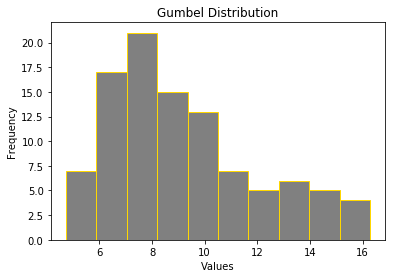

9.2287260062


In [164]:
mu = 8
beta = 2
n_sample = 100
from scipy.stats import gumbel_r

gumbel = np.random.gumbel(mu, beta, n_sample)
mean = np.mean(gumbel)
plt.hist(gumbel, color = 'grey', edgecolor = 'gold')
plt.title('Gumbel Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
print(mean)

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=8$ and $\beta=2$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 95% confidence interval for the mean.

The analytical mean of the Gumbel distribution is $\mu + \beta\gamma$ where $\gamma = $ Euler-Mascheroni constant.  
The analytical variance of the Gumbel distribution is $\frac{\pi^2}{6}\beta^2$ 

In [158]:
anal_mean = mu+beta*np.euler_gamma
print(anal_mean)

9.154431329803066


In [160]:
anal_var = ((np.pi**2)/6)*(beta**2)
print(anal_var)

6.579736267392906


To find the confidence interval of the mean, I use the same formula for finding a confidence interval:  
$\displaystyle CI = \bar{X} \pm z_{\alpha/2}\left(\frac{\sigma}{\sqrt{n}}\right)$  
In this case, $\bar{X} =$ the sample mean from **Part A**  
$\sigma = $ the true variance of the Gumbel distrobution.  
From above problems I know that the $z_{\alpha/2} = 1.96$ and we know that n = 100.

$\displaystyle CI = 9.229 \pm 1.96 \left(\frac{6.579}{\sqrt{100}}\right)$  
This gives us the interval of [7.8155, 10.3947]

In [163]:
sample_mean = mean
std_dev = anal_var
z_alpha = stats.norm.ppf(.975)
n = 100
confidence_interval = []
confidence_interval.append(sample_mean - z_alpha * (std_dev/math.sqrt(n)))
confidence_interval.append(sample_mean + z_alpha * (std_dev/math.sqrt(n)))

print(confidence_interval)

[7.8155169841156038, 10.394726206488023]


**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 95% confidence interval of $[8.81, 9.82]$ for the mean of the $Gum(\mu=8, \beta=2)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=8, \beta=2)$ distribution, you could say there is a 95% chance that its true mean falls between 8.81 and 9.82.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gum(\mu=8, \beta=2)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** There is a 95% probability that any given random variable sampled from $Gum(\mu=8, \beta=2)$ will be between 8.81 and 9.82.

**Part C** Answers

**(i)** This is not correct because the true mean never changes. Therefore, it doesnt have a probability of falling within a certain range. It would be more accurate to say that there is a 95% chance the confidence interval contains the true mean.  
**(ii)** This is correct. What a 95% confidence interval means is that 95% of confidence intervals obtained from sampling will contain the true mean, so it would be expected that 95 of the students CIs would contain the true mean, and 5 would not.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=8$ and $\beta=2$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

In [ ]:
def confidence_intervals(m=500, n=100):
    mu = 8
    beta = 2
    # Your code here
    proportion_CIs_covering_mean = 0
    print("proportion covering mean: {:.3f}".format(proportion_CIs_covering_mean))
    
    
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrows
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You are driving through the paint toward the basket when Steph Curry fouls you. You step to the line to sink this freethrow shot, which is delivered in the form of a CSCI3022 problem:</font>

You have a shuffled deck of cards. It includes the usual 52 cards AND three special additional Octopus cards. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip over the second Octopus.  You repeat this many times. Simulate this process. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot too, using linstyles of green dashed, pink dotted, and black solid, respectively. Look up how to do a legend in MatPlotLib, and label your histogram, mean, median.
***

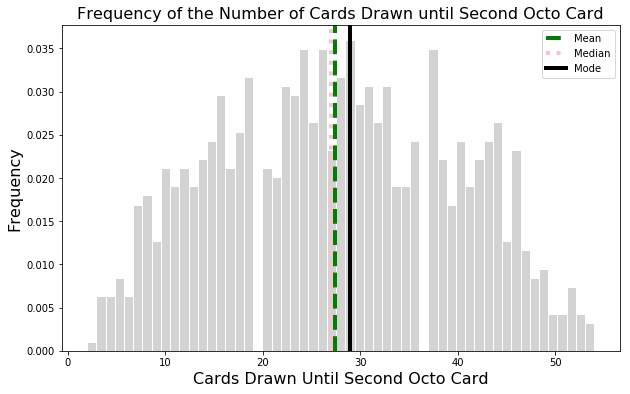

In [183]:
deck = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,11,11,11,11,12,12,12,12,13,13,13,13,'octo','octo','octo']

draw = []
sims = 1000

for i in range (sims):
    choice = np.random.choice(deck, replace = False, size = 55)
    octoCards = 0
    card = 0
    numDraws = 0
    while octoCards < 2:
        if (str(choice[card])=='octo'):
            octoCards += 1
        card += 1
        numDraws += 1
    draw.append(numDraws)

mean = np.mean(draw)
median = np.median(draw)
mode = stats.mode(draw)
mode = list(mode[0])[0]

fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.hist(draw, density = True, bins = 55, color = 'lightgrey', edgecolor = 'white')
ax.set_title('Frequency of the Number of Cards Drawn until Second Octo Card', fontsize = 16)
ax.set_xlabel('Cards Drawn Until Second Octo Card', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.axvline(mean, color = 'green', linestyle = 'dashed', linewidth = 4, label = 'Mean')
ax.axvline(median, color = 'pink', linestyle = 'dotted', linewidth = 4, label = 'Median')
ax.axvline(mode, color = 'black', linestyle = 'solid', linewidth = 4, label = "Mode")
ax.legend()
plt.show()

**Part B**: <font color='green'>You sink your first free throw and immediately get dap from your teammates, Oscar O'Flaherty and Octavia O'Flaherty. You prepare to take another shot, which—and you're not going to believe this—is another CSCI3022 problem:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?
***

A 99% confidence interval will be wider. Thankfully, my younger sibling is my twin brother who is 8 minutes younger than me, so explaining it to him shouldn't be too hard. A confidence interval is the interval that likely contain the true mean (or whatever parameter) of our data set. The higher the interval, the higher likelyhood that our interval contains the true mean, or whatever parameter. For example, if you were shooting free throws (much like we are now) a larger hoop gives me a higher percentage that my free throw makes it in the hoop. A hoop that is 10 feet in diameter gives me a much higher chance that I'll make it in, that a 2 foot hoop.

**Part C**: <font color='green'>The crowd is silent. Everything is slow motion. You're literally in the air, releasing what looks to be a perfect shot to tie the match. As you release the ball, a hand appears to block it. It is Kevin Durant. :( 

Luckily, his fingertips also brush against your arm. That's a foul, and everyone saw it. Back to the line. Back to CSCI3022:</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **durant**, below. Compute a 95% confidence interval for the _standard deviation_.
***

In order to find the confidence interval for the SD, I first need to find the CI for variance. This requires using a Chi Squared distribution, with degrees of freedom n-1, which in this case is 9. For this confidence interval, we need to choose two critical values, ${\chi^2}_{1-\alpha/2,n-1}$ and ${\chi^2}_{\alpha/2,n-1}$. Then with $100*(1-\alpha)$% confidence we can say that $\displaystyle \frac{(n-1)S^2}{{\chi^2}_{1-\alpha/2,n-1}} < \sigma^2 < \frac{(n-1)S^2}{{\chi^2}_{1-\alpha/2,n-1}}$  

Since this formula give the CI for variance, in order to find the CI for the SD, we take the square root of each side. 

In [185]:
durant = np.array([3.7778,3.9459,3.8248,4.1111,4.0180,4.0898,4.0380,3.9273,3.9614,3.8387])

In [195]:
sample_variance = np.var(durant)
std_dev = np.std(durant)
n = 10 
alpha = 0.05
upper = stats.chi2.ppf(0.025, 9)
lower = stats.chi2.ppf(0.975, 9)
ci = []
ci.append(math.sqrt((sample_variance*9)/lower))
ci.append(math.sqrt((sample_variance*9)/upper))
print(ci)

[0.07412530902803935, 0.19673886654275355]


**Part D**: <font color='green'>"Draymond Green has it all, in spite of living in the Bay Area," you think to yourself. "But he doesn't have this shot..." You're all over him, and he's going to have to pass. You can see the irritation in his eyes. Then you realize that it's not irritation, and he's not being distracted by your superb defense. He's being distracted by this CSCI3022 problem:</font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.

***

I would rather have a low Type II error rate. A Type II error would mean that the null hypothesis is false and was not rejected. In other words, a Type II error is essentially a false negative. In respect to this problem, that would mean that the carbon was below tolerance and unsafe, but was not rejected resulting in unsafe carbon being used in the construction of this airplane. If the Type I error rate is low, then that means that carbon that is actually above tolerance and safe for construction is being rejected, which doesn't compromise the safety of the airplane. 

**Part E**: <font color='green'>You are watching tape footage at halftime with your personal trainer, Stella O'Flaherty. You gotta focus up if you're going to match Klay Thompson's speed in the second half. You take a sip of Gatorade and Dr. O'Flaherty suggests that you do the following CSCI3022 problem:</font>

You measure 53 suckers from baby reef octopuses and find that they are, on average, 45.2 mm wide, with a standard devaition of 30.4mm. 

Then you measure 41 suckers from from baby dumbo octopuses and find that they are, on average, 52.8 mm wide, with a standard deviation of 22.8 mm. 

Is there statistical evidence at the 0.05 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 6 mm?  Use a test of your choice.

***

In order to find if there is a differnce in the true means of the baby octopus sucker width, I will look at the confidence interval for the difference in mean sucker width.  

$\displaystyle CI = \bar{X}-\bar{Y} \pm z_{\alpha/2} SD$, where $\displaystyle SD = \sqrt{\frac{\sigma_{1}^2}{m}+\frac{\sigma_{2}^2}{n}}$ 

In [200]:
dif_mean = 52.8-45.2

std_dev_dumbo = 22.8
std_dev_dumbo_squared = (std_dev_dumbo)**2

std_dev_reef = 30.4
std_dev_reef_squared = (std_dev_reef)**2

z_alpha = stats.norm.ppf(.975)
n = 53
m = 41

confidence_interval_dif = []

confidence_interval_dif.append(dif_mean - z_alpha * (math.sqrt( ((std_dev_reef_squared)/m) + ((std_dev_dumbo_squared)/n) )))
confidence_interval_dif.append(dif_mean + z_alpha * (math.sqrt( ((std_dev_reef_squared)/m) + ((std_dev_dumbo_squared)/n) )))
print(confidence_interval_dif)

[-3.5474904574907331, 18.74749045749072]


There is not statistical evidence becuase the confidence interval for the difference in mean sucker width includes 0, which means that there is a reasonable possibility that the true mean or baby dumbo octopuses is no different than the true mean of baby reef octopuses. 